## 주제선정:Titanic 생존자 예측
## 타이타닉 침몰 사고
 여객선 타이타닉호는 1912년 4월 15일 영국에서 출항해  빙산에 충돌해 침몰했고 많은 사망자가 있었다. 

## 데이터 분석 목적
1. 생존과 사망에 영향을 미치는 승객 정보는 무엇이 있는가?

    (그 중 생존률이 가장 높은 승객 정보는 무엇인가?
     그 중 사망률이 가장 높은 승객 정보는 무엇인가?)
   

2. 변수들의 연관성으로 새로운 사실을 도출한다.- 피쳐추출하기


3. 알아낸 사실을 시각화하여 이해를 높인다.


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터 수집

In [66]:
#타이타닉 데이터 가져오기

train= pd.read_csv('titanic/train.csv',index_col=False) #index_col=False 첫 행의 데이터가 열 이름이 된다.
test= pd.read_csv('titanic/test.csv',index_col=False)


## 데이터 셋확인

In [4]:
#호출하여 불러올 수 있는 key값 확인 # train.keys()
#컬럼정보 확인하기.
print(train.columns.values)
print(test.columns.values)#test에는 Survived 없음
print(train.keys())

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
#파일 타입확인하기
print("train",type(train))
print("test",type(test))

train <class 'pandas.core.frame.DataFrame'>
test <class 'pandas.core.frame.DataFrame'>


In [67]:
#데이터 미리보기
train.head(2) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
#생존수 확인
print(train['Survived'].value_counts())#총 891

0    549
1    342
Name: Survived, dtype: int64


In [8]:
# 행, 열
print(train.shape ,test.shape)

(891, 12) (418, 11)


In [9]:
#데이터 전반적인 정보 확인
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
# describe -> 통계량 결과 요약  # (include='all') 모든 열 데이터 출력
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
#정형 데이터 => 수치데이터가 있는 열만 결과 확인 
train.describe(None)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# 문자열 포함 데이터 확인 => 해당 값들 수치 데이터로 바꿔주기.
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 데이터 가공

#### 가. 결측치 확인 및 처리 

In [13]:
# 결측치 확인 Ture - 결측치
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# 결측치 개수 확인 T=1 ,F=0
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
# null제외 개수
print(train.count(axis=0))

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


#### Age 177 결측치 처리

In [16]:
#정규 표현식 사용하여 Name에서 Title 추출 전처리
for dataset in train:
    train['Title']=train['Name'].str.extract('([A-Za-z]+)\.',expand=False)

print(train['Title'].value_counts().sort_index())

print(train.groupby(by='Title')['Age'].mean())

# 정규표현식: 특정한 규칙을 가진 문자열을 검색하거나 치환하기 위해 사용된다. # [a-zA-Z] : 알파벳 모두
# Dot(.) 메타 문자는 줄바꿈 문자인 \n을 제외한 모든 문자와 매치됨
# +는 앞의 문자를 1번 이상 반복하는 것을 의미
##'( (' ([a-zA-Z]+).')'  띄어쓰기로 시작해 모든 알파벳이 포함된 문자열을 한 번이상 반복하다가 dot(.)으로 마무리하는 문자열이다. 따라서 Mr,Miss 등 영어 호칭이 추출된다
# 문자열 처리법 : expand=True이면 여러 컬럼, False이면 1개 컬럼에 리스트

Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: Title, dtype: int64
Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64


In [17]:
#결측치 Age처리 전처리 
#평균을 구하는 코드에는 NaN값이 있어도 잘 계산이 되지만 중앙값을 구할 때는 계산이 잘 안된다.
train.loc[(train["Age"].isnull())&(train["Title"]=='Mr'),'Age']=32 #Mr의 평균
train.loc[(train.Age.isnull())&(train.Title=='Mrs'),'Age']=36 #Mrs의 평균
train.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age']=22 # Miss의 평균
train.loc[(train.Age.isnull())&(train.Title=='Master'),'Age']=5 # Master의 평균
train.loc[(train.Age.isnull())&(train.Title=='Dr'),'Age']=42 # Dr의 평균


In [18]:
# Age 결측치 0개
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


#### Embarked 2 결측치 처리

In [19]:
# 승선항 개수 확인 
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# 승선항 2개 결측치  fillna로 채워주기
train.Embarked.fillna('S', inplace=True)
print(train.Embarked)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [21]:
# 승선항 결측치 0개
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64


#### Cabin 687개 결측치 처리

In [22]:
# 가설) 선원과 파견직은 객실번호가 없을 수 있다.
train.drop(labels="Cabin",axis=1,inplace=True)

In [23]:
'''
# 객실번호 687개 결측치 처리

승객들은 총 1,317명
선원들은 총 885명이 타고 있었다.
갑판부 - 총 66명. 배의 운항을 책임지는 부서. 총 책임자는 수석항해사 헨리 와일드. 상선사관들 중 항해사(선장 이하 7명)들이 여기에 속했다. 조타수 위주로 구명정을 몰도록 정당 1~2명씩은 태웠기 때문에, 제일 생존률이 높았다.[31]
기관부 - 총 325명. 배의 동력을 책임지는 부서. 총 책임자는 기관장 조셉 G. 벨. 상선사관들 중 기관사(25명)들이 여기에 속했다. 가장 숫자가 많은 직책은 배에 끊임없이 석탄을 집어넣는 176명의 화부들로, 이들 중 13명이 화부장으로 화부들을 인솔했다. 침몰 당시 물을 빼고 동력을 유지하며 가장 고생했는데 기관사는 항해사들과 달리 전부 사망했다.
사주부 - 총 431명. 배의 서비스를 제공하는 부서로 숫자가 제일 많았다. 총 책임자는 사무장 토머스 매카울리. 제일 많은 직책은 객실 승무원 즉 스튜어드(322명)였다. 마르코니사에서 온 통신사(2명)도 갑판부가 아니라 여기에 포함되었는데 주고받는 통신 대부분은 운항 관련이 아니라 승객들의 것들 대신 주고보내주는 것이었기 때문이다.
이 세 부서에 속하지 않은 나머지 선원들은 타 회사에서 온 파견직으로, 레스토랑/카페 점원(69명)[32], 우편원(5명), 악단(8명)[33], 그리고 조선업체에서 보증으로 탑승한 관계자들(9명).[34] 파견직 선원들은 침몰 당시 생존율이 제일 낮았다.

여성 승무원은 23명이 타고 있었다.[35] 이 중 20명은 스튜어디스였고 3명은 카페 점원이었으며, 총원 중 스튜어디스 3명이 사망했다.
'''

'\n# 객실번호 687개 결측치 처리\n\n승객들은 총 1,317명\n선원들은 총 885명이 타고 있었다.\n갑판부 - 총 66명. 배의 운항을 책임지는 부서. 총 책임자는 수석항해사 헨리 와일드. 상선사관들 중 항해사(선장 이하 7명)들이 여기에 속했다. 조타수 위주로 구명정을 몰도록 정당 1~2명씩은 태웠기 때문에, 제일 생존률이 높았다.[31]\n기관부 - 총 325명. 배의 동력을 책임지는 부서. 총 책임자는 기관장 조셉 G. 벨. 상선사관들 중 기관사(25명)들이 여기에 속했다. 가장 숫자가 많은 직책은 배에 끊임없이 석탄을 집어넣는 176명의 화부들로, 이들 중 13명이 화부장으로 화부들을 인솔했다. 침몰 당시 물을 빼고 동력을 유지하며 가장 고생했는데 기관사는 항해사들과 달리 전부 사망했다.\n사주부 - 총 431명. 배의 서비스를 제공하는 부서로 숫자가 제일 많았다. 총 책임자는 사무장 토머스 매카울리. 제일 많은 직책은 객실 승무원 즉 스튜어드(322명)였다. 마르코니사에서 온 통신사(2명)도 갑판부가 아니라 여기에 포함되었는데 주고받는 통신 대부분은 운항 관련이 아니라 승객들의 것들 대신 주고보내주는 것이었기 때문이다.\n이 세 부서에 속하지 않은 나머지 선원들은 타 회사에서 온 파견직으로, 레스토랑/카페 점원(69명)[32], 우편원(5명), 악단(8명)[33], 그리고 조선업체에서 보증으로 탑승한 관계자들(9명).[34] 파견직 선원들은 침몰 당시 생존율이 제일 낮았다.\n\n여성 승무원은 23명이 타고 있었다.[35] 이 중 20명은 스튜어디스였고 3명은 카페 점원이었으며, 총원 중 스튜어디스 3명이 사망했다.\n'

In [24]:
# 결측치 0개
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64


In [25]:
#필요없는 다쓴 문자열 데이터 드롭
train.drop(labels="PassengerId",axis=1,inplace=True)
train.drop(labels="Name",axis=1,inplace=True)
train.drop(labels="Ticket",axis=1,inplace=True)
train.drop(labels="Title",axis=1,inplace=True) #제자리에','가동할 준비가 되어 있는', '~을 위한 준비가 되어 ... inplace = True인 경우 원본 df의 메모리에 그래도 적용이된다.

#### 나. 인코딩 처리
- 	Sex	  Embarked
-   성별   승선항

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
train = pd.get_dummies(train) # df에 문자열 한번에 원핫인코딩하기

In [28]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,22.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [29]:
#컬럼 제거
train.drop(labels="Embarked_C",axis=1,inplace=True)
train.drop(labels="Sex_female",axis=1,inplace=True)

#### 다. 표준화처리 - 결정트리기반은 표준화처리 필요없음 pass

### 필요한 데이터 추출

In [32]:
# 상관관계 확인하기.
train.corr

<bound method DataFrame.corr of      Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0           0       3  22.0      1      0   7.2500         1           0   
1           1       1  38.0      1      0  71.2833         0           0   
2           1       3  26.0      0      0   7.9250         0           0   
3           1       1  35.0      1      0  53.1000         0           0   
4           0       3  35.0      0      0   8.0500         1           0   
..        ...     ...   ...    ...    ...      ...       ...         ...   
886         0       2  27.0      0      0  13.0000         1           0   
887         1       1  19.0      0      0  30.0000         0           0   
888         0       3  22.0      1      2  23.4500         0           0   
889         1       1  26.0      0      0  30.0000         1           0   
890         0       3  32.0      0      0   7.7500         1           1   

     Embarked_S  
0             1  
1             0  
2

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 

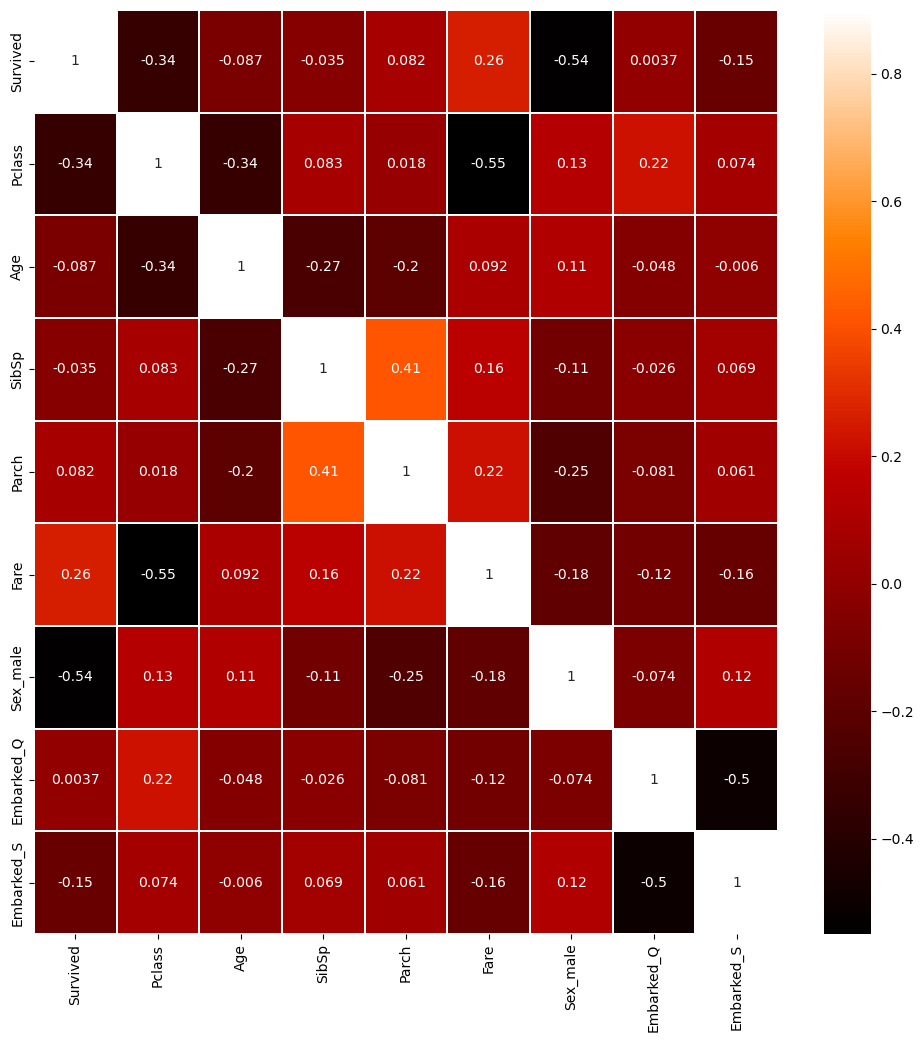

In [34]:
# 시각화
# heatmap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
colormap = plt.cm.gist_heat   #그래프의 색상 구성.
plt.figure(figsize=(12,12))   #그래프의 크기.

# 그래프의 속성을 결정합니다. vmax의 값을 0.9로 지정해 0.9에 가까울 수록 밝은 색으로 표시.
sns.heatmap(train.corr(),linewidths=0.1,vmax=0.9, cmap=colormap, linecolor='white',annot=True)
plt.show()


In [60]:
# Survived과 Pclass 서로 관계높음
# Pclass과 Fare 서로 관계높음
# Age과 Pclass 서로 관계높음
# SibSp과 Parch 서로 관계높음

### 이상치 처리

In [37]:
# age 소수점 자리 없애기
#  astype(): float에서 int로의 캐스트 float에서 int로 캐스트할 경우 소수점 이하와 잘리고, 마이너스값은 0으로 반올림된다.
train['Age']= train['Age'].astype('int')
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0


In [38]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1,0,1
887,1,1,19,0,0,30.0000,0,0,1
888,0,3,22,1,2,23.4500,0,0,1
889,1,1,26,0,0,30.0000,1,0,0


### 모델학습을 위한 준비

### 입력데이터와 label 생성

In [39]:
# 훈련데이터 data/target으로 만들기
train_data = train.iloc[:,1:] #[전채행, 1열부터 마지막열까지]
train_target = train.iloc[:,0] # [타겟 전체행, 1열만]


In [40]:
train_data

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22,1,0,7.2500,1,0,1
1,1,38,1,0,71.2833,0,0,0
2,3,26,0,0,7.9250,0,0,1
3,1,35,1,0,53.1000,0,0,1
4,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,1,0,1
887,1,19,0,0,30.0000,0,0,1
888,3,22,1,2,23.4500,0,0,1
889,1,26,0,0,30.0000,1,0,0


In [41]:
train_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [42]:
# 데이터 2차원 테스트 1차원 확인
train_data.shape, train_target.shape

((891, 8), (891,))

### 훈련데이터안에서 검증데이터 만들기.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test=train_test_split(train_data, train_target, test_size=0.2)

In [45]:
# 총 891개중에 712개가 훈련 데이터
X_train.shape, y_train.shape

((712, 8), (712,))

In [46]:
# 총 891개중에 179개가 테스트 데이터
X_test.shape, y_test.shape

((179, 8), (179,))

### 모델 생성

In [47]:
from sklearn.tree import DecisionTreeClassifier # GridSearchCV 
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.model_selection import cross_validate # 교차검증
from sklearn.metrics import confusion_matrix # 분류성능평가지표 
from sklearn.metrics import accuracy_score # 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### RandomForest 예측

In [48]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy)) #소수점 4자리까지표현

랜덤 포레스트 정확도: 0.8101


In [49]:
# RandomForest의 하이퍼 파라미터 default 상태
model = RandomForestClassifier()
model

RandomForestClassifier()

### GridSearchCV를 통한 랜덤포레스트의 하이퍼 파라미터 튜닝¶

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
# params = {'n_estimators': range(2,100,10), # 결정트리의 갯수 지정
#           'min_samples_split': range(2,10,2), # 노드분할 최소 샘플데이터수 과적합제어에사용
#           'min_samples_leaf': range(1,4,2), #리프노드가 되기 위해 필요한 최소한의 샘플 데이터수 과적합제어용도 불균형데이터의경우 데이터작아질 수 있으므로 작게 설정 필요
#           'max_features': range(1,20,5), # 최적이 분할을 위해 고려할 최대 feature 개수          
#           'max_depth': range(1,10,2), # 트리의 최대깊이 깊이가 깊어지면 과적합될수있음
#           'max_leaf_nodes': range(1,50,5)} # 리프노드의 최대 개수   

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# clf = RandomForestClassifier(random_state=1, n_jobs= -1)
# gs =GridSearchCV(clf, param_grid=params, scoring="accuracy", n_jobs=-1, refit=True, cv=3, verbose=1)

# gs.fit(X_train, y_train)

# print('최적 하이퍼 파라미터: ', gs.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(gs.best_score_))

# # 최적 하이퍼 파라미터:  {'max_depth': 7, 'max_features': 11, 'max_leaf_nodes': 21, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 92}
# # 최고 예측 정확도: 0.8371

### 파라미터 조정후 RandomForest

In [52]:
clf = RandomForestClassifier(n_estimators=92,
                             min_samples_split=2,
                            min_samples_leaf=3,
                            max_features=11,
                            max_depth=7,
                            max_leaf_nodes=21,
                            random_state=1,
                            n_jobs= -1)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy)) 
#랜덤 포레스트 정확도: 0.8436

랜덤 포레스트 정확도: 0.8436


### 분류 성능평가지표 오차행렬로  예측성능을 평가

In [58]:
def performance_matrix(y_test, pred):
    clf = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print("오차행렬")
    print(clf)
    ### f1 score: 정밀도와 재현율이 trade off 관계이기 때문에 두개의 조화가 매우 중요. 얼마나 잘 조화되는지를 알려주는 함수이다.
    f1 = f1_score(y_test, pred)
    print("정확도: {}".format(accuracy))
    print("정밀도: {}".format(precision))
    print("재현율: {}".format(recall))
    print("f1_score: {}".format(f1))



In [59]:
performance_matrix(y_test, pred)

오차행렬
[[105  11]
 [ 17  46]]
정확도: 0.8435754189944135
정밀도: 0.8070175438596491
재현율: 0.7301587301587301
f1_score: 0.7666666666666667
